ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

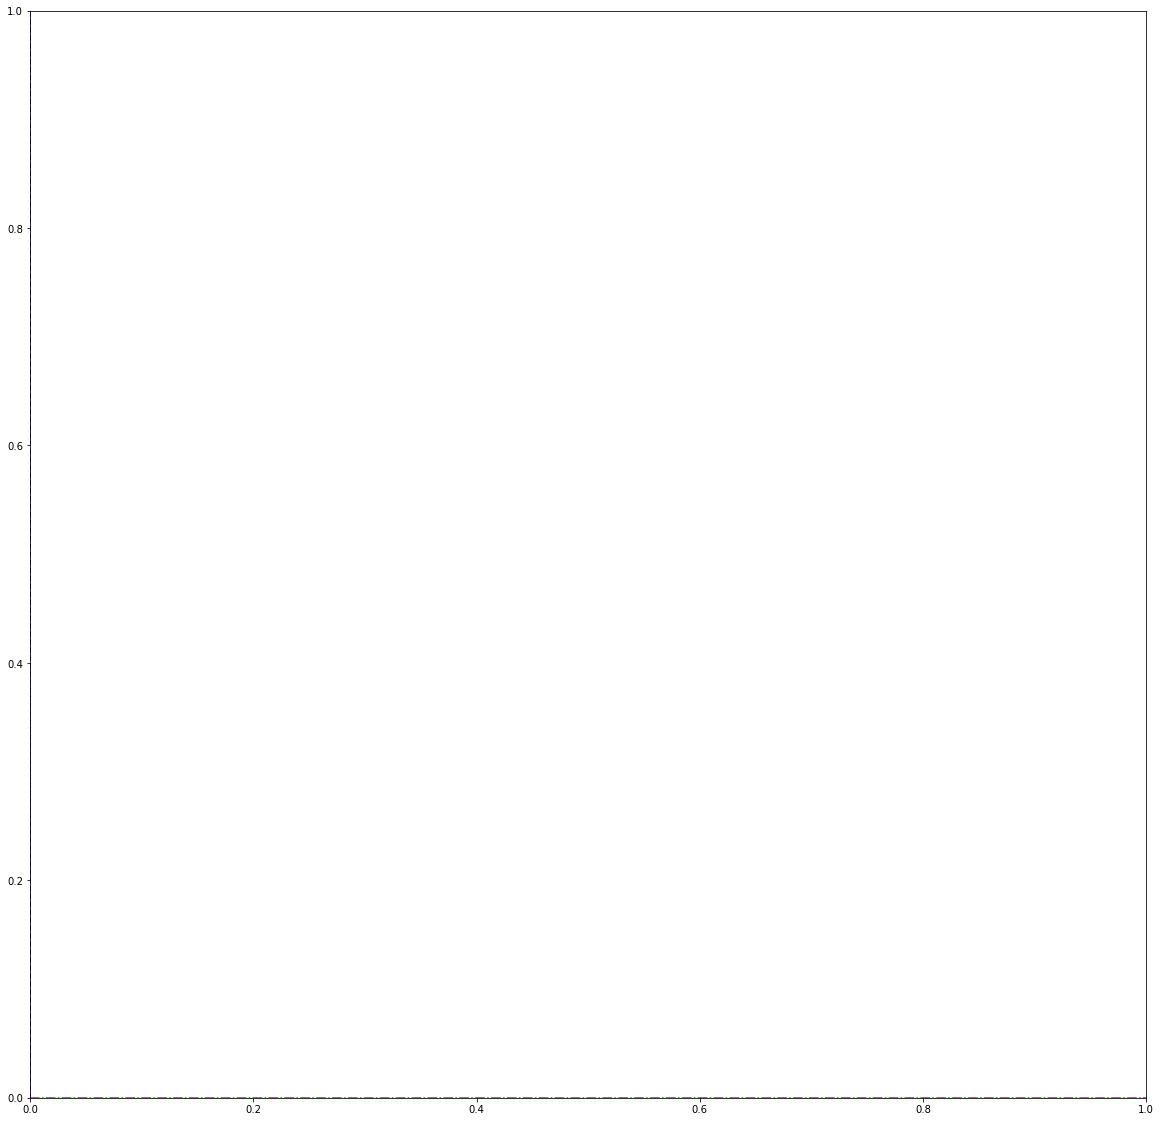

In [10]:
#AI-TECHGYM-1-14-Q-1
#自然言語処理

#実行フォルダ
import os
os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_1\Answer_sheet\AI_Chapter1_saved_files")

#インポート
import numpy as np
import pandas as pd

#主成分分析
from sklearn.decomposition import PCA

#グラフ
from matplotlib import pylab as plt
import matplotlib.font_manager as font_manager

# word2vec データ読み込み
from gensim.models import KeyedVectors

#フォントの準備
import urllib.request as req
url = "https://github.com/hokuto-HIRANO/Word2Vec/raw/master/font/Osaka.ttc"
req.urlretrieve(url, "./Osaka.ttc")

#フォント指定
FONTPATH='./Osaka.ttc'
prop = font_manager.FontProperties(fname=FONTPATH)

#グラフサイズ
plt.figure(figsize=(20,20))

# ダウンロード先のパスを指定
MODEL_FILENAME = "./stanby-jobs-200d-word2vector.bin"
w2v = KeyedVectors.load_word2vec_format(MODEL_FILENAME, binary=True)

# データの読み込み
df = pd.read_csv("words.csv") 

#ベクトルの取得
vectors = []
zero_vec = np.zeros(200)

for word in df['words']:
  try:
    vectors.append(w2v[word])
  except:
    vectors.append(zero_vec)

#単語のベクトル表現を2次元に圧縮する
pca = PCA(n_components=2)
pca.fit(vectors)
vectors_pca= pca.transform(vectors)

# グラフの縦軸・横軸の目盛間隔を揃える
# plt.figure(figsize = (18, 18))
# plt.gca().set_xlim(-6, 6)
# plt.gca().set_ylim(-6, 6)

# plt.grid(color='k', linestyle='--', linewidth=0.5)

# y=0に水平線を引く
# plt.axhline(0, ls = "-.", color = "magenta")
plt.axhline(0, ls = "-.", color = "m")

# x=0に垂直線を引く
# plt.axvline(0, ls = "--", color = "navy")
plt.axvline(0, ls = "--", color = "b")

for v in vectors_pca:
  plt.plot(v[:0], v[:1])
plt.show()

C:\Users\tsuchida\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\tsuchida\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<Figure size 1440x1440 with 0 Axes>

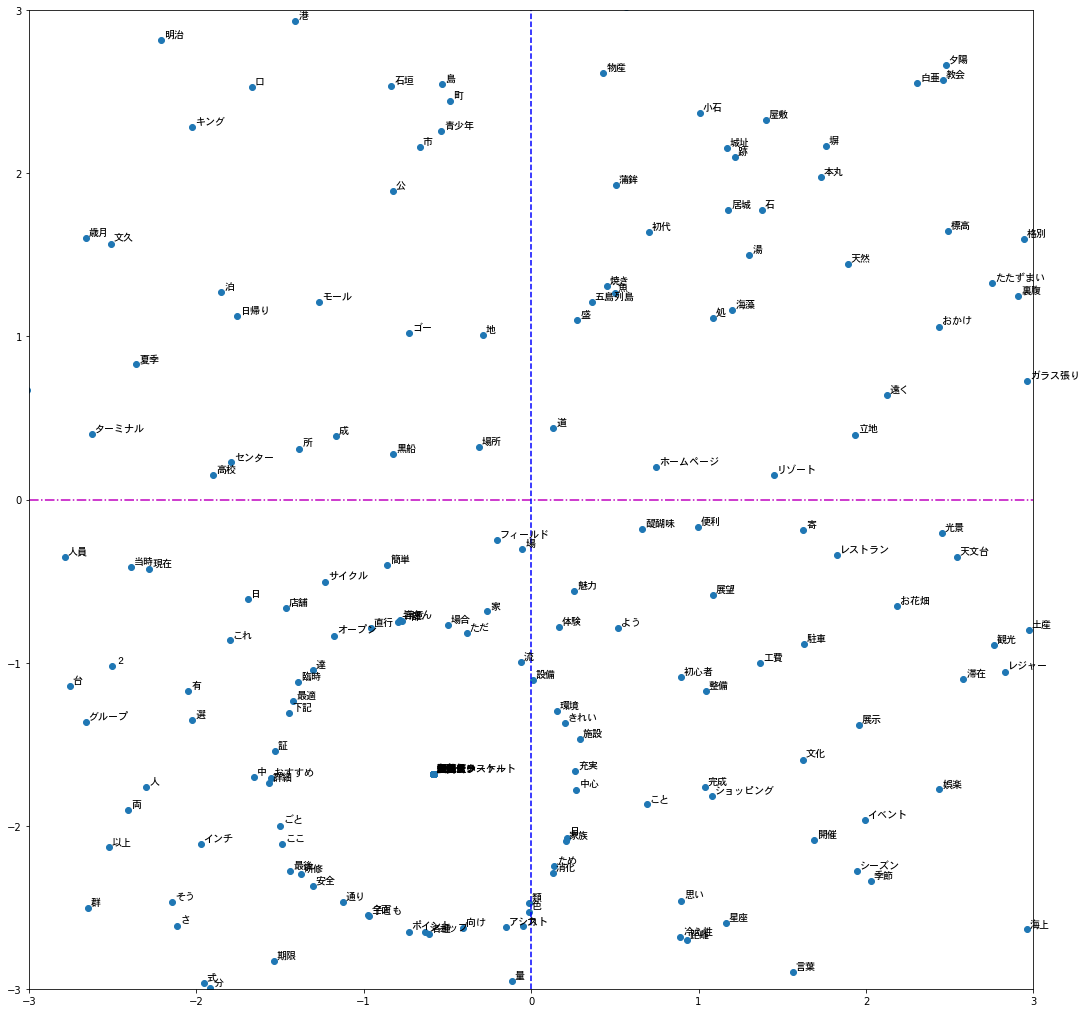

In [47]:
#AI-TECHGYM-1-14-A-2
#自然言語処理

#インポート
import numpy as np
import pandas as pd
import os

os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_1\Answer_sheet\AI_Chapter1_saved_files")

#次元削減
from sklearn.manifold import TSNE

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

#グラフ
from matplotlib import pylab as plt
import matplotlib.font_manager as font_manager

# word2vec データ読み込み
from gensim.models import KeyedVectors

#フォントの準備
import urllib.request as req
url = "https://github.com/hokuto-HIRANO/Word2Vec/raw/master/font/Osaka.ttc"
req.urlretrieve(url, "./Osaka.ttc")

#フォント指定
FONTPATH='./Osaka.ttc'
prop = font_manager.FontProperties(fname=FONTPATH)

#グラフサイズ
plt.figure(figsize=(20,20))

# ダウンロード先のパスを指定
MODEL_FILENAME = "./stanby-jobs-200d-word2vector.bin"
w2v = KeyedVectors.load_word2vec_format(MODEL_FILENAME, binary=True)

# データの読み込み
df = pd.read_csv("words.csv") 

#ベクトルの取得
vectors = []
zero_vec = np.zeros(200)

for w in df["words"].values:
    try:
        vectors.append(w2v[w])
    except Exception as e:
        vectors.append(zero_vec)

#次元削減
tsne = TSNE(n_components=2, random_state=0)
V = tsne.fit_transform(vectors)

# クラスタリング
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit(vectors)
df_V['cluster'] = pd.Series(clusters.labels_, index=df_V.index)

# グラフの縦軸・横軸の目盛間隔を揃える
plt.figure(figsize = (18, 18))
plt.gca().set_xlim(-3, 3)
plt.gca().set_ylim(-3, 3)

# plt.grid(color='k', linestyle='--', linewidth=0.5)

# y=0に水平線を引く
# plt.axhline(0, ls = "-.", color = "magenta")
plt.axhline(0, ls = "-.", color = "m")

# x=0に垂直線を引く
# plt.axvline(0, ls = "--", color = "navy")
plt.axvline(0, ls = "--", color = "b")

#ベクトルを平面にプロット
plt.scatter(V[:, 0], V[:,1])

#文字のプロット
for w, x, y in zip(df["words"].values, V[:,0], V[:,1]):
    plt.annotate(w, xy=(x, y), xytext=(3,3), textcoords='offset points', fontproperties=prop, fontsize=10)

#グラフ表示
plt.show()


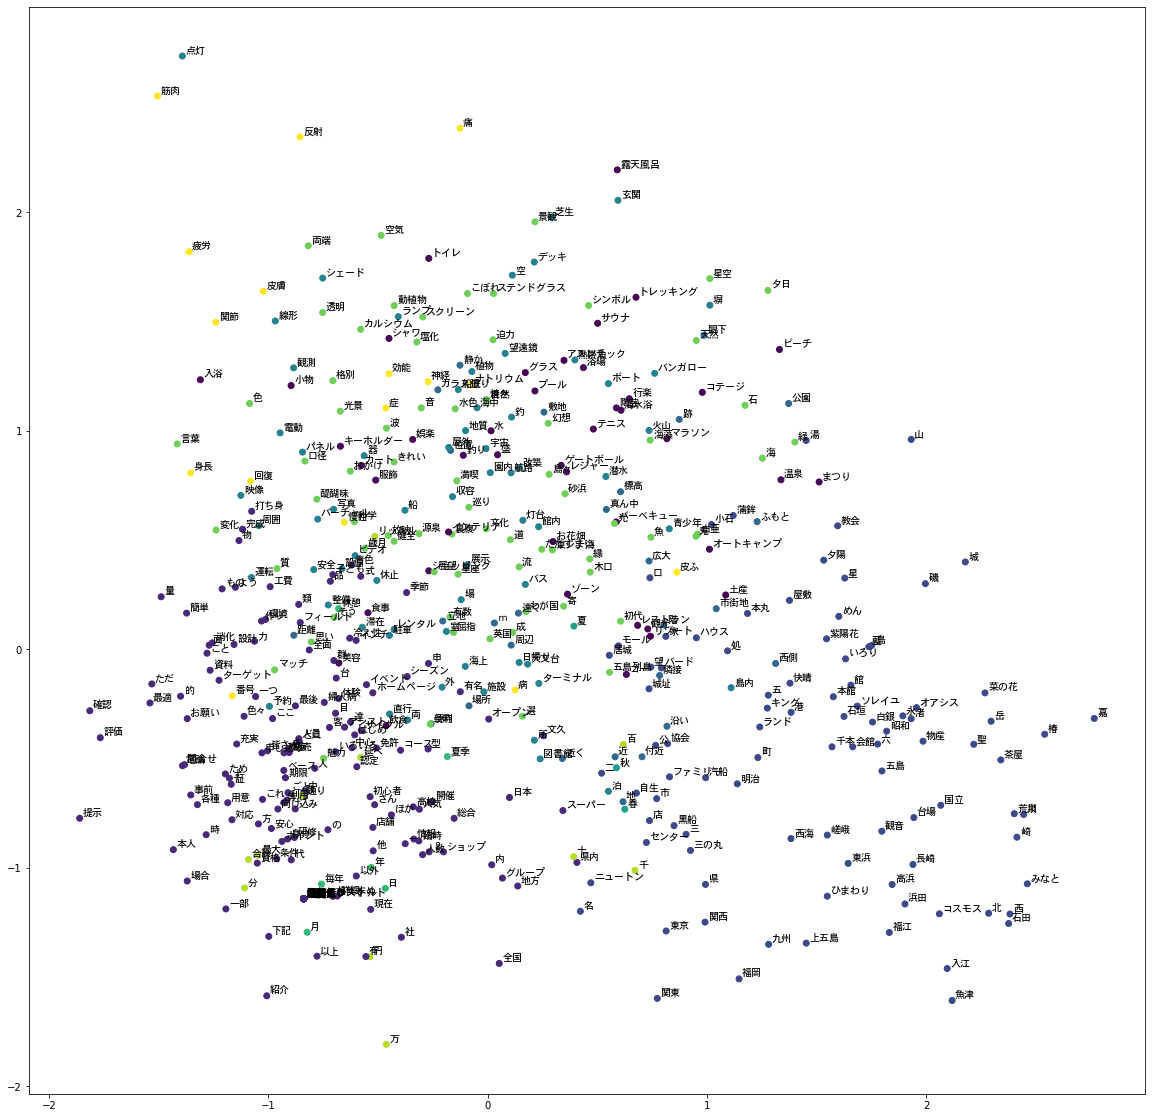

In [40]:
#AI-TECHGYM-1-14-A-2
#自然言語処理

#インポート
import numpy as np
import pandas as pd

#主成分分析
from sklearn.decomposition import PCA

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

#グラフ
from matplotlib import pylab as plt
import matplotlib.font_manager as font_manager

# word2vec データ読み込み
from gensim.models import KeyedVectors

#フォントの準備
import urllib.request as req
url = "https://github.com/hokuto-HIRANO/Word2Vec/raw/master/font/Osaka.ttc"
req.urlretrieve(url, "./Osaka.ttc")

#フォント指定
FONTPATH='./Osaka.ttc'
prop = font_manager.FontProperties(fname=FONTPATH)

#グラフサイズ
plt.figure(figsize=(20,20))

# ダウンロード先のパスを指定
MODEL_FILENAME = "./stanby-jobs-200d-word2vector.bin"
w2v = KeyedVectors.load_word2vec_format(MODEL_FILENAME, binary=True)

# データの読み込み
df = pd.read_csv("words.csv") 

#ベクトルの取得
vectors = []
zero_vec = np.zeros(200)

for w in df["words"].values:
    try:
        vectors.append(w2v[w])
    except Exception as e:
        vectors.append(zero_vec)

#PCA
pca = PCA(n_components=2)
V = pca.fit_transform(vectors)
df_V = pd.DataFrame(V)

# クラスタリング
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit(vectors)
df_V['cluster'] = pd.Series(clusters.labels_, index=df_V.index)

#色指定
color = df_V.cluster.astype(float)

#ベクトルを平面にプロット
plt.scatter(V[:, 0], V[:,1],c=color)

#文字のプロット
for w, x, y in zip(df["words"].values, V[:,0], V[:,1]):
    plt.annotate(w, xy=(x, y), xytext=(3,3), textcoords='offset points', fontproperties=prop, fontsize=10)

#グラフ表示
plt.show()


In [43]:
pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

""


In [12]:
#アヤメデータを読み込むためのインポート
from sklearn.datasets import load_iris

#アヤメデータの取得
iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [49]:
#AI-TECHGYM-1-4-A-3
#教師なし学習 k-mean法

# データ加工・処理・分析ライブラリ
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データがあるurl の指定
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

# データを取得して展開する
#対象データを読み込み
shoppers= pd.read_csv(file_url)

# データの列の絞り込み
shoppers_sub = shoppers[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','Region','SpecialDay']]

# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(shoppers_sub)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# 金融機関のデータにクラスター番号のデータを結合
shoppers_with_cluster = pd.concat([shoppers, labels], axis=1)

# 分割のための区切りを設定
bins = [0,0.2,0.4,0.6,0.8,1]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_sp = pd.cut(shoppers_with_cluster.SpecialDay, bins, right=False)

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_sp], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_sp = df.groupby(['cluster_number', 'SpecialDay']).size().unstack().fillna(0)
display(cross_cluster_sp)

# 分割のための区切りを設定
bins_2 = [1,2,3,4,5,6,7,8,9]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_r = pd.cut(shoppers_with_cluster.Region, bins_2, right=False, labels=[1,2,3,4,5,6,7,8])

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_r], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_r = df.groupby(['cluster_number', 'Region']).size().unstack().fillna(0)
display(cross_cluster_r)


SpecialDay,"[0.0, 0.2)","[0.2, 0.4)","[0.4, 0.6)","[0.6, 0.8)","[0.8, 1.0)"
cluster_number,,,,,
0,386,6,7,2,15
1,10,0,0,0,0
2,1096,9,28,26,20
3,2807,49,48,83,71
4,6657,114,159,240,218
5,123,0,1,0,1


Region,1,2,3,4,5,6,7,8
cluster_number,,,,,,,,
0,181,39,83,35,12,25,17,15
1,8,0,1,1,0,0,0,0
2,464,119,239,110,27,64,78,39
3,1145,302,616,302,79,212,207,120
4,2912,667,1444,727,196,500,453,260
5,70,9,20,7,4,4,6,0
